11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 - 32s - 37ms/step - accuracy: 0.9448 - loss: 0.1863 - val_accuracy: 0.9853 - val_loss: 0.0541
Epoch 2/5
844/844 - 29s - 35ms/step - accuracy: 0.9829 - loss: 0.0548 - val_accuracy: 0.9880 - val_loss: 0.0430
Epoch 3/5
844/844 - 42s - 49ms/step - accuracy: 0.9885 - loss: 0.0371 - val_accuracy: 0.9883 - val_loss: 0.0415
Epoch 4/5
844/844 - 29s - 35ms/step - accuracy: 0.9908 - loss: 0.0293 - val_accuracy: 0.9903 - val_loss: 0.0360
Epoch 5/5
844/844 - 41s - 49ms/step - accuracy: 0.9929 - loss: 0.0226 - val_accuracy: 0.9887 - val_loss: 0.0388
313/313 - 2s - 7ms/step - accuracy: 0.9868 - loss: 0.0402

✅ Test Accuracy: 98.68%
🎯 Goal achieved! Test accuracy exceeds 95%.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


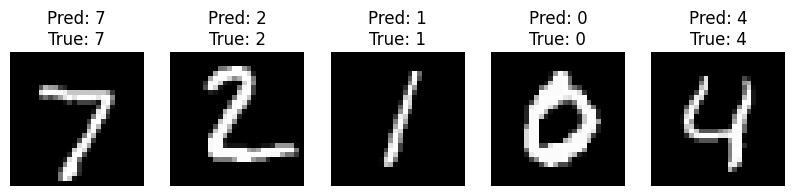

In [1]:
# ============================================
# Task 2: Deep Learning with TensorFlow
# Dataset: MNIST Handwritten Digits
# Goal: Build a CNN to classify digits & achieve >95% accuracy
# ============================================

# 1️⃣ Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# 2️⃣ Load and preprocess the MNIST dataset
# MNIST: 60,000 training and 10,000 testing images (28x28 grayscale)
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Add a channel dimension (CNN expects 4D input: batch, height, width, channels)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# 3️⃣ Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    layers.MaxPooling2D((2, 2)),                                            # Down-sampling
    layers.Conv2D(64, (3, 3), activation='relu'),                           # Deeper feature extraction
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),                                                       # Flatten to 1D vector
    layers.Dense(64, activation='relu'),                                    # Fully connected layer
    layers.Dense(10, activation='softmax')                                  # Output layer (10 digits)
])

# 4️⃣ Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 5️⃣ Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

# 6️⃣ Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

# Ensure performance >95%
if test_acc >= 0.95:
    print("🎯 Goal achieved! Test accuracy exceeds 95%.")
else:
    print("⚠️ Model below target accuracy — consider increasing epochs or tuning layers.")

# 7️⃣ Visualize model predictions on 5 sample test images
num_samples = 5
sample_images = X_test[:num_samples]
sample_labels = y_test[:num_samples]
predictions = model.predict(sample_images)

plt.figure(figsize=(10, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {sample_labels[i]}")
    plt.axis('off')
plt.show()
